<a href="https://colab.research.google.com/github/Jarnoesse/IA-AGN-with-ML/blob/main/Pycaret_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jul 25 20:20:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 277 (delta 59), reused 40 (delta 20), pack-reused 171
Receiving objects: 100% (277/277), 80.66 KiB | 1.34 MiB/s, done.
Resolving deltas: 100% (121/121), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:35
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable core
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.06
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.06


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20210324.0      |       h9c3ff4c_0        1011 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    anyio-3.3.0                |   py37h89c1867_0         146 KB  conda-forge
    argon2-cffi-20.1.0         |   py37h5e8e339_2          47 KB  conda-fo

In [3]:
!pip install scikit-learn==0.23.2

!pip install "tune-sklearn>=0.2.1"
!pip install "scikit-optimize>=0.8.1"

!pip install ppscore

!pip install sklearn-som
!pip install umap
!pip install trimap
!pip install "pacmap==0.4"

!pip install cmasher
!pip install colorcet
!pip install mpl-scatter-density

!pip install "xgboost>=1.1.0"
!pip install "catboost>=0.23.2"
!pip install shap

# !pip install BorutaShap

# Only for GPU usage
!pip uninstall lightgbm -y
# install lightgbm GPU
!pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

# !pip install --upgrade "xgboost>=1.1.0"
!pip install --upgrade "catboost>=0.23.2"
!pip install --upgrade shap
!pip install pycaret

     |████████████████████████████████| 6.8 MB 7.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
     |████████████████████████████████| 40 kB 4.7 MB/s 
     |████████████████████████████████| 51.6 MB 40 kB/s 
     |████████████████████████████████| 10.1 MB 40.8 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 127 kB 66.0 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 3.1 MB 47.5 MB/s 
     |████████████████████████████████| 72 kB 653 kB/s 
     |████████████████████████████████| 4.3 MB 35.8 MB/s 
     |████████████████████████████████| 124 kB 54.9 MB/s 
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 93 kB 1.7 MB/s 
     |████████████████████████████████| 198 kB 75.4 MB/s 
  Created wheel for gp

     |████████████████████████████████| 101 kB 5.2 MB/s 
     |████████████████████████████████| 47 kB 3.0 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=7362be44aa83e2a6b9666a8a06c71913cce1ea94e566083b23173c12bfb322d0
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=d912c0eea783ad92294944775eddec0020116238a95e943c1593aea3187f6da7
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap
     |████████████████████████████████| 5.6 MB 7.5 MB/s 
     |████████████████████████████████| 646 kB 46.4 MB/s 
  Created wheel for trimap: filename=trimap-1.0.15-py3-none-any.whl size=14637 sha256=cf679550e617348a53c54b11e9f02e62508fb1e0225c466bca37f88829dc7c28
  Stored in directory: /root/.cache/pip/wheels/d2/bc/e3

In [4]:
%matplotlib inline
# Static plots
#%matplotlib ipympl
# Interactive plots
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as mpe
from matplotlib.ticker import FuncFormatter
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import mpl_scatter_density
from astropy.table import Table, join
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import plot_confusion_matrix, classification_report
import ppscore as pps
import seaborn as sns
import cmasher as cmr
import colorcet as cc
import getpass
# import pacmap
# import umap
# import trimap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn_som import som
import pandas as pd
import re
import shap
# from BorutaShap import BorutaShap
import pycaret.regression as pyr
import pycaret.classification as pyc
# import missingno as msno
import os
import subprocess


RuntimeError: ignored

In [5]:
class MidpointNormalize(mcolors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [6]:
pe1            = [mpe.Stroke(linewidth=5.0, foreground='black'),
                  mpe.Stroke(foreground='white', alpha=1),
                  mpe.Normal()]
pe2            = [mpe.Stroke(linewidth=3.0, foreground='white'),
                  mpe.Stroke(foreground='white', alpha=1),
                  mpe.Normal()]

alp_str        = r'$\alpha$'

In [7]:
table_des_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_DES_specZ_milliquas_basicFeatures.csv'
table_des_cat = Table.read(table_des_catalogue_URL)

des_df = table_des_cat.to_pandas()

table_ps_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_PS_specZ_milliquas_basicFeatures.csv'
table_ps_cat = Table.read(table_ps_catalogue_URL)

ps_df = table_ps_cat.to_pandas()

table_sm_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_SM_specZ_milliquas_basicFeatures.csv'
table_sm_cat = Table.read(table_sm_catalogue_URL)

sm_df = table_sm_cat.to_pandas()

In [8]:
des_df['W1-W2'] = des_df['W1MAG']-des_df['W2MAG']
des_df['J-KS'] = des_df['J_VISTA']-des_df['KS_VISTA']
des_df['KS-W1'] = des_df['KS_VISTA']-des_df['W1MAG']
des_df['G-R'] = des_df['MAG_G']-des_df['MAG_R']
des_df['R-Z'] = des_df['MAG_R']-des_df['MAG_Z']
des_df['Z-J'] = des_df['MAG_Z']-des_df['J_VISTA']
des_df['G-RadioR'] = des_df['MAG_G']-des_df['flux_int']
des_df['W2-RadioR'] = des_df['W2MAG']-des_df['flux_int']

ps_df['W1-W2'] = ps_df['W1MAG']-ps_df['W2MAG']
ps_df['J-KS'] = ps_df['J_VISTA']-ps_df['KS_VISTA']
ps_df['KS-W1'] = ps_df['KS_VISTA']-ps_df['W1MAG']
ps_df['G-R'] = ps_df['MAG_G']-ps_df['MAG_R']
ps_df['R-Z'] = ps_df['MAG_R']-ps_df['MAG_Z']
ps_df['Z-J'] = ps_df['MAG_Z']-ps_df['J_VISTA']
ps_df['G-RadioR'] = ps_df['MAG_G']-ps_df['flux_int']
ps_df['W2-RadioR'] = ps_df['W2MAG']-ps_df['flux_int']

sm_df['W1-W2'] = sm_df['W1MAG']-sm_df['W2MAG']
sm_df['J-KS'] = sm_df['J_VISTA']-sm_df['KS_VISTA']
sm_df['KS-W1'] = sm_df['KS_VISTA']-sm_df['W1MAG']
sm_df['U-G'] = sm_df['MAG_U']-sm_df['MAG_G']
sm_df['G-R'] = sm_df['MAG_G']-sm_df['MAG_R']
sm_df['R-Z'] = sm_df['MAG_R']-sm_df['MAG_Z']
sm_df['Z-J'] = sm_df['MAG_Z']-sm_df['J_VISTA']
sm_df['G-RadioR'] = sm_df['MAG_G']-sm_df['flux_int']
sm_df['W2-RadioR'] = sm_df['W2MAG']-sm_df['flux_int']

In [9]:
des_df = des_df.drop(['col0','catalogue_id','flux_peak','quality_level','SOURCEID_VISTA','W1MAG','J_VISTA','KS_VISTA','MAG_G','MAG_R','MAG_I','MAG_Z'], axis = 1)
ps_df = ps_df.drop(['col0','catalogue_id','flux_peak','quality_level','SOURCEID_VISTA','W2MAG','J_VISTA','KS_VISTA','MAG_G','MAG_R','MAG_I','MAG_Z'], axis = 1)
sm_df = sm_df.drop(['col0','catalogue_id','flux_peak','quality_level','SOURCEID_VISTA','W1MAG','J_VISTA','KS_VISTA','MAG_U','MAG_G','MAG_R','MAG_I','MAG_Z'], axis = 1)

In [10]:
def get_final_column_names(pycaret_pipeline, sample_df):
    for (name, method) in pycaret_pipeline.named_steps.items():
        if method != 'passthrough' and name != 'trained_model':
            print(f'Running {name}')
            sample_df = method.transform(sample_df)
    return sample_df.columns.tolist()

def get_feature_importances_df(pycaret_pipeline, sample_df, n = 10):
    
    final_cols = get_final_column_names(pycaret_pipeline, sample_df)
    
    try:
        variables = pycaret_pipeline["trained_model"].feature_importances_
        
    except:
        variables = np.mean([
                        tree.feature_importances_ for tree in pycaret_pipeline["trained_model"].estimators_ 
            if hasattr(tree, 'feature_importances_')
                        ], axis=0)
    
    coef_df = pd.DataFrame({'Feature': final_cols, 'Importance': variables})
    sorted_df = (
        coef_df.sort_values(by='Importance', ascending=False)
        .head(n)
        .sort_values(by='Importance', ascending=True).reset_index(drop=True)
    )
    return sorted_df

def delta_z(y, y_pred, **kwargs):
    num = np.abs(y - y_pred)
    den = 1 + y
    return np.nanmedian(num / den)

In [11]:
seed = 42
pstt1_df = ps_df.dropna()  #drop the non classified so we can have a train test sample
ps_unlabeled = ps_df[ps_df['spec_class'].isnull()]   #this is the data we want to predict the labels in

pstt2_df = pstt1_df.copy() #sem sample! 

#pstt3_df = pstt2_df.drop(['z_spec'],axis=1)  #we dont want to use the redshift because we dont have it in the data to predict on
#pstt4_df = pstt2_df.drop(['spec_class'],axis=1)

pstt3_df = pstt2_df.sample(frac=0.90, random_state=seed)  # Train + test sets
psval1_df = pstt2_df.drop(pstt3_df.index)  # Validation data

pstt_df = pstt3_df.drop(['z_spec'],axis=1)
psval_df = psval1_df.drop(['z_spec'],axis = 1)

psttred_df = pstt3_df.drop(['spec_class'],axis=1)
psvalred_df = pstt3_df.drop(['spec_class'],axis=1)

print('Shape of used data')
print('-' * 40)
print(f'Full Dataset size: {ps_df.shape}')
print(f'Data for Modeling (Train and Test): {pstt_df.shape}')
print(f'Unseen Data For Validation: {psval_df.shape}')
print('-' * 40)

Shape of used data
----------------------------------------
Full Dataset size: (71513, 14)
Data for Modeling (Train and Test): (12118, 13)
Unseen Data For Validation: (1346, 13)
----------------------------------------


In [13]:
pstt_df

,n_components,flux_int,W1MAG,PSTAR_VISTA,spec_class,W1-W2,J-KS,KS-W1,G-R,R-Z,Z-J,G-RadioR,W2-RadioR
71227,1,13.155325,17.897,0.000171,1,-0.287000,0.518911,0.007116,-0.2982,1.4851,0.336973,6.791575,5.028675
48150,1,15.810548,17.396,0.052478,1,0.650999,0.692296,0.810906,0.0275,0.5638,-0.274902,3.405052,0.934452
15561,1,15.929085,17.902,0.000171,2,-0.847000,0.486747,-0.038583,1.2816,1.8095,0.385236,5.897415,2.819915
6303,1,13.763563,17.936,0.000010,2,-0.415000,0.500823,-0.708428,1.3170,0.7987,0.474705,6.555237,4.587437
36358,1,16.602305,18.211,0.000171,1,-0.030000,0.534955,-0.410857,0.8854,0.5112,0.216502,3.345895,1.638696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30108,1,14.893494,15.757,0.000171,2,-0.374000,0.281390,-1.086598,0.4922,0.8035,-0.085592,1.268406,1.237506
9208,1,16.443192,17.926,0.000010,2,-0.632000,0.456820,0.028930,0.7585,1.7961,0.588150,5.111308,2.114808
28885,1,13.090787,14.878,0.003067,2,-0.610000,0.021907,-0.609699,0.8326,0.6783,-0.041108,2.669213,2.397213
40975,1,15.279394,15.895,0.000171,2,-0.394000,0.001660,-1.206188,0.3575,0.2057,0.099628,0.073906,1.009606


Trying to add a dimension reduction algorytm to get better clustering of Data

In [12]:
from sklearn.decomposition import KernelPCA

In [41]:
attributes = ["n_components","flux_int","W1MAG","PSTAR_VISTA","W1-W2","KS-W1","G-R","R-Z","G-RadioR","W2-RadioR"]
transformer = KernelPCA(n_components = 5, kernel='linear')
transformed = transformer.fit_transform(pstt_df[attributes].values)

In [25]:
transformed

array([[-4.81675017,  0.4273394 ],
       [ 0.78332542, -1.1746467 ],
       [-2.14231106, -2.01140522],
       ...,
       [ 0.3833901 ,  2.75519221],
       [ 3.57751322,  1.10770834],
       [-4.6694675 ,  0.43538437]])

In [42]:
attributes = ["x1","x2","x3","x4","x5"]
df_PCA = pd.DataFrame(columns=attributes,data=transformed) 

In [43]:
df_PCA["spec_class"] = pstt_df["spec_class"].to_numpy()

In [44]:
df_PCA

,x1,x2,x3,x4,x5,spec_class
0,-4.816750,0.427339,-0.971078,0.164419,1.020691,1
1,0.783325,-1.174647,-0.647073,1.715282,-0.166245,1
2,-2.142311,-2.011405,0.699838,-0.173591,0.821670,2
3,-4.190178,-0.108142,0.102666,-0.784764,-0.189622,2
4,0.593763,-2.054892,-0.555978,-0.156600,-0.437342,1
...,...,...,...,...,...,...
12113,2.443984,1.130719,-0.240818,-0.407587,0.240696,2
12114,-1.019215,-2.285836,0.273466,0.183071,0.966750,2
12115,0.383390,2.755192,0.445374,-0.132290,0.142764,2
12116,3.577513,1.107708,-0.868943,-0.692560,-0.259122,2


In [45]:
exp_mclf = pyc.setup(data=df_PCA, target='spec_class', session_id=seed, silent=True,\
                     feature_selection=True, feature_selection_method='boruta',\
                     n_jobs=-1, normalize=True, normalize_method='zscore',use_gpu='force', fix_imbalance = True)

,Description,Value
0,session_id,42
1,Target,spec_class
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(12118, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [46]:
pyc.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,cuml.linear_model.logistic_regression.Logistic...,True
knn,K Neighbors Classifier,cuml.neighbors.kneighbors_classifier.KNeighbor...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,cuml.linear_model.mbsgd_classifier.MBSGDClassi...,True
rbfsvm,SVM - Radial Kernel,pycaret.internal.cuml_wrappers.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,cuml.linear_model.ridge.Ridge,True


In [47]:
# Catboost uses GPU only if rows > 50000
gpu_ready_models = ['lr', 'ridge', 'knn', 'rf', 'xgboost', 'lightgbm'] #took catboost and svm out they take VERY LONG

# top5 = pyr.compare_models(n_select=5, exclude=['huber', 'lar', 'llar', 'lasso', 'en'], sort='z_met')
top5 = pyc.compare_models(n_select=5, include=gpu_ready_models, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8876,0.9184,0.6968,0.9003,0.8932,0.6814,0.6828,0.796
lightgbm,Light Gradient Boosting Machine,0.8797,0.9187,0.7145,0.9005,0.8888,0.6675,0.6707,1.343
xgboost,Extreme Gradient Boosting,0.8795,0.9167,0.6941,0.8973,0.8874,0.6640,0.6665,1.838
knn,K Neighbors Classifier,0.8212,0.8878,0.7265,0.8772,0.8424,0.5590,0.5763,0.366
ridge,Ridge Classifier,0.7772,0.0000,0.7072,0.8972,0.8298,0.4949,0.5260,0.069
lr,Logistic Regression,0.7370,0.8922,0.7138,0.8956,0.8033,0.4486,0.4942,0.045


In [48]:
pyc.get_config('X').columns

Index(['x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')

In [49]:
pyc_stacked = pyc.stack_models(estimator_list=top5[0:1]+top5[2:5], meta_model=top5[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8740,0.9096,0.6659,0.8821,0.8776,0.6395,0.6402
1,0.8940,0.9161,0.6730,0.8959,0.8947,0.6844,0.6846
2,0.9045,0.9149,0.5799,0.9067,0.9056,0.7191,0.7191
3,0.8809,0.9082,0.6855,0.8862,0.8832,0.6510,0.6511
4,0.8974,0.9084,0.6347,0.8987,0.8980,0.6965,0.6965
5,0.8833,0.9128,0.5611,0.8874,0.8853,0.6603,0.6605
6,0.8892,0.9043,0.5678,0.8893,0.8891,0.6770,0.6773
7,0.8868,0.9176,0.7695,0.8927,0.8891,0.6787,0.6802
8,0.8892,0.9178,0.6751,0.8886,0.8875,0.6573,0.6599
9,0.8892,0.8919,0.6256,0.8917,0.8903,0.6712,0.6713


In [50]:
tuned_stacked = pyc.tune_model(pyc_stacked) #28 mins

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8822,0.9186,0.7343,0.8942,0.8873,0.6696,0.6714
1,0.9022,0.9263,0.6849,0.9062,0.9040,0.7133,0.7133
2,0.9163,0.9318,0.5960,0.9167,0.9164,0.7562,0.7565
3,0.8762,0.9169,0.6919,0.8902,0.8825,0.6505,0.6519
4,0.9080,0.9159,0.6476,0.9125,0.9102,0.7301,0.7302
5,0.8833,0.9134,0.6329,0.8896,0.8860,0.6670,0.6680
6,0.8915,0.9056,0.7109,0.8996,0.8948,0.6943,0.6962
7,0.8974,0.9227,0.7852,0.9072,0.9011,0.7135,0.7162
8,0.8998,0.9307,0.7638,0.9019,0.9004,0.7017,0.7019
9,0.8892,0.8991,0.6298,0.8947,0.8918,0.6762,0.6764


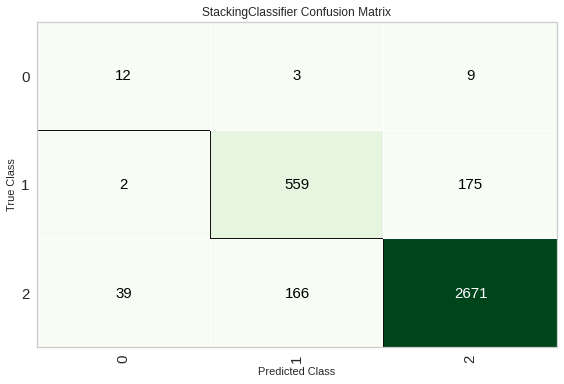

In [51]:
pyc.plot_model(tuned_stacked,plot='confusion_matrix')

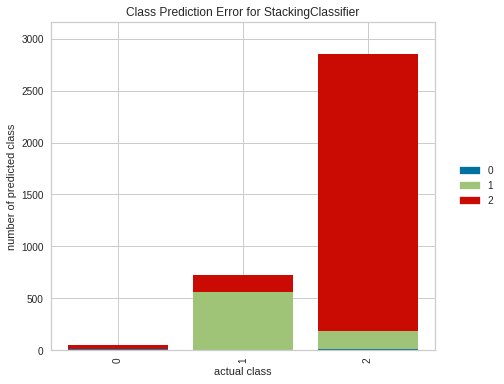

In [52]:
pyc.plot_model(tuned_stacked,plot='error')